<a href="https://colab.research.google.com/github/verondel/data_analysis/blob/main/hw_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 2: Проверка статистических гипотез

### pingouin installation

In [ ]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=900c49508bd0d99e1e41fc75d011485fb1a7128a2d4d695ca363fb2ddfd04a63
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


### libs and file connection


In [ ]:
import os
import pandas as pd
import numpy as np
from numpy import array
from numpy.random import seed
from numpy.random import rand
from numpy.random import randn
from statsmodels.stats.power import TTestIndPower #
from statsmodels.stats.power import TTestPower
from statsmodels.stats.power import FTestAnovaPower
from statsmodels.stats.weightstats import ztest
from statistics import mean
from scipy import stats
# from scipy.stats import fligner
import matplotlib.pyplot as plt
import pingouin as pg
import random

Датасеты: \
1. [Latest Data Science Salaries](https://www.kaggle.com/datasets/iamsouravbanerjee/data-science-salaries-2023/data?select=Latest_Data_Science_Salaries.csv)
2. [Data science job salary](https://www.kaggle.com/datasets/milanvaddoriya/data-science-job-salary/data)

3. [Mobile Phone Price](https://www.kaggle.com/datasets/rkiattisak/mobile-phone-price/data)
4. [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

In [ ]:
os.chdir("/content/drive/MyDrive/sem5_python/data")

filename_1 = "Latest_Data_Science_Salaries.csv"
#filename_2 = "SaYoPillow.csv"
filename_3 = "Mobile phone price.csv"
filename_4 = "StudentsPerformance.csv"

### 1, 2. (chdir(), head())

In [ ]:
df_1 = pd.read_csv(filename_1)
df_1.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


**Вывод**: Этот датасет содержит информацию о занятости, опыте работы, должности, заработной плате и других характеристиках для различных профессий в области работы с данными. Он также включает информацию о местоположении компаний и их размере.

### 3.  plt.hist(log_salary)

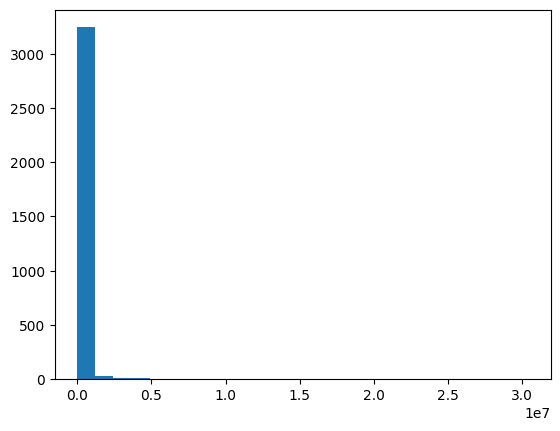

In [ ]:
param = 'Salary'

salary = df_1[param]
plt.hist(salary, bins=25)
plt.show()

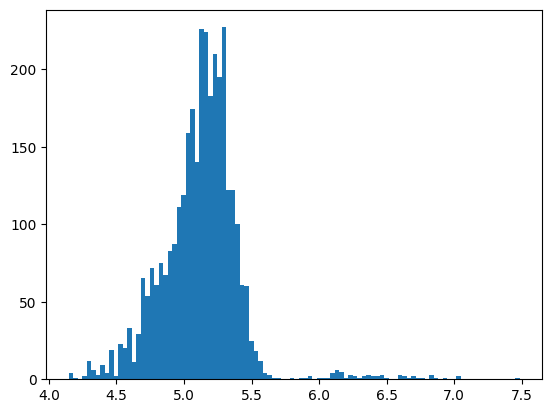

In [ ]:
log_salary = np.log10(df_1[param])
plt.hist(log_salary, bins=100)
plt.show()

**Вывод:** После логарифмирования значений столбца Salary распределение визуально не стало нормальным, что может свидетельствовать о том, что исходные данные могут иметь нелинейные или более сложные структуры, которые не удается устранить простым логарифмированием.

### 4. Критерий Шапиро-Уилка

In [ ]:
stats.shapiro(log_salary)

ShapiroResult(statistic=0.8915144205093384, pvalue=2.5783891743576634e-43)

**Вывод:** Результат теста Шапиро-Уилка для логарифмированных данных Salary показывает, что p-значение (p-value) < 0.05. Нулевая гипотеза о нормальном распределении данных отвергается. Распределение логарифмированных данных Salary статистически значимо отличается от нормального распределения.

### 5. Замена значений

In [ ]:
df_3 = pd.read_csv(filename_3)
df_3.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [ ]:
df_3.columns = df_3.columns.str.strip()
df_3['Storage'] = df_3['Storage'].str.replace(' GB','')
df_3['Storage'] = pd.to_numeric(df_3['Storage'] , errors='coerce')

df_3['RAM'] = df_3['RAM'].str.replace(' GB','')
df_3['RAM'] = pd.to_numeric(df_3['RAM'] , errors='coerce')

df_3 = df_3[~(df_3["Screen Size (inches)"] == "6.8 + 3.9")]
df_3 = df_3[~(df_3["Screen Size (inches)"] == "7.6 (unfolded)")]
df_3["Screen Size (inches)"] = df_3["Screen Size (inches)"].astype("float64")

df_3.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128.0,6.0,6.10,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256.0,12.0,6.80,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128.0,8.0,6.70,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128.0,6.0,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128.0,8.0,6.40,50 + 12.2,4614,799


In [ ]:
# Подсчет пропущенных значений в каждой строке
missing_values_count = df_3.isnull().sum(axis=1)
print(missing_values_count.head())

0    0
1    0
2    0
3    0
4    0
dtype: int64


In [ ]:
print(df_3['Battery Capacity (mAh)'].min(), df_3['Price ($)'].min(), df_3['Screen Size (inches)'].min())

1821 $1,199  4.5


**Вывод:** В данном датасете не обнаружено некорректных или недостоверных значений (например, значений типа NaN или -999999), которые требовалось бы исключить или заменить для проведения анализа.

### 6. Корреляция размера экрана и емкости батареи

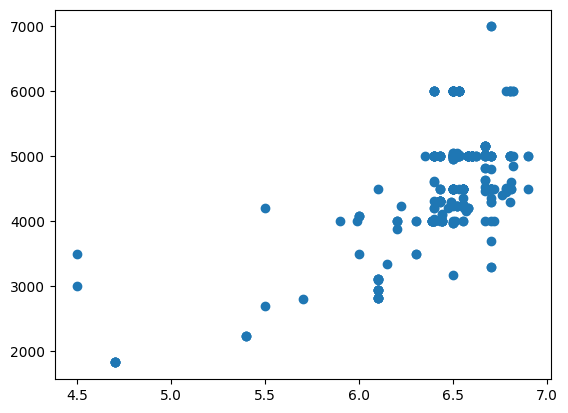

In [ ]:
plt.scatter(df_3['Screen Size (inches)'], df_3['Battery Capacity (mAh)'])
plt.show()

**Вывод:**  Между размером экрана и емкостью батареи наблюдается умеренная положительная линейная зависимость. При увеличении размера экрана скорее всего увеличивается емкость батареи

#### heatmap

<ipython-input-13-c26e5d1d46f6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_3.corr(), annot = True)


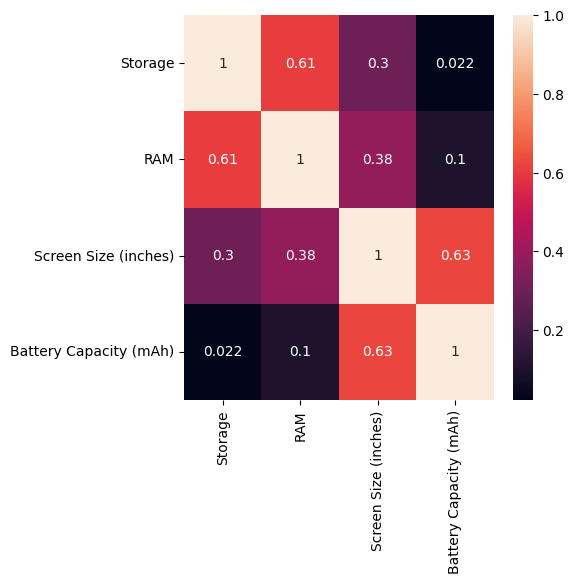

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(5,5))
sns.heatmap(df_3.corr(), annot = True)
plt.show()

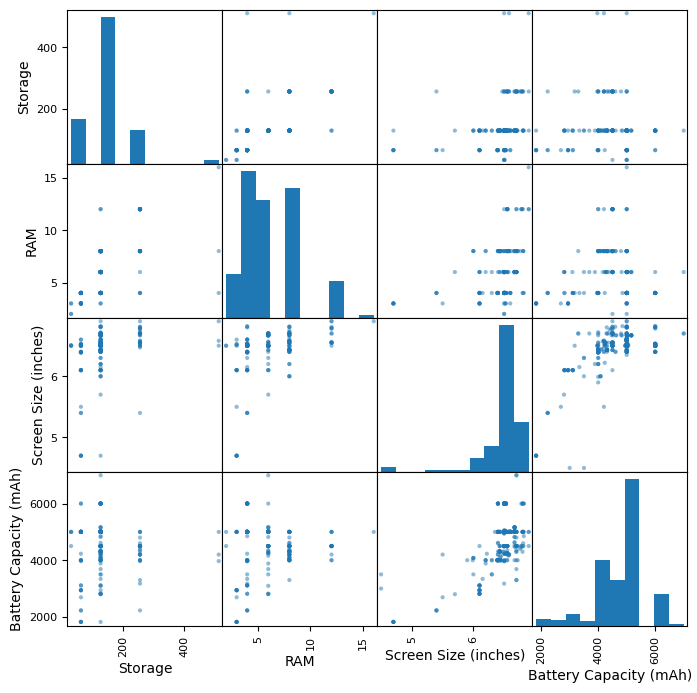

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_3, figsize=(8,8))
plt.show()

### 7. Коэффициент корреляции Пирсона

Проверка на нормальность распределения переменных

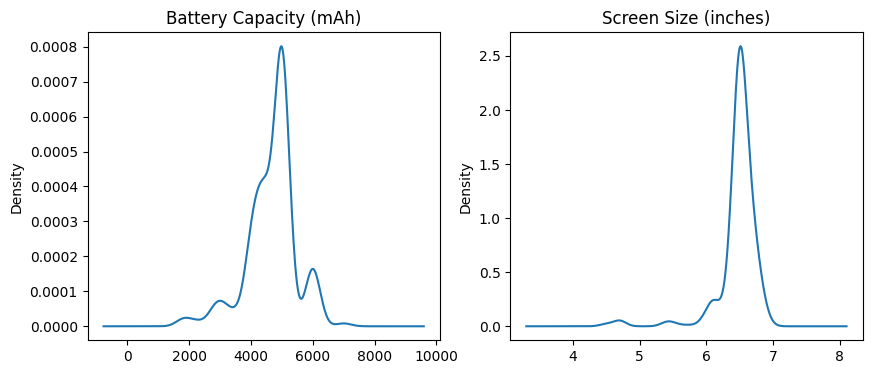

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))   # Создаем одну строку с двумя графиками

# График 1: Распределение емкости батареи
df_3['Battery Capacity (mAh)'].plot(kind='kde', ax=axes[0])
axes[0].set_title('Battery Capacity (mAh)')

# График 2: Распределение размера экрана
df_3['Screen Size (inches)'].plot(kind='kde', ax=axes[1])
axes[1].set_title('Screen Size (inches)')

plt.show()

In [ ]:
column_bc = df_3['Battery Capacity (mAh)']
column_ss = df_3['Screen Size (inches)']
bc_p = stats.shapiro(column_bc).pvalue
ss_p = stats.shapiro(column_ss).pvalue
print(bc_p, ss_p)

4.9871126103683415e-17 1.9062738732821643e-29


**Вывод**:

Результат теста Шапиро-Уилка показывает, что p-value в обоих случаях меньше 0.05. Нулевая гипотеза о нормальном распределении данных отвергается.

Распределение статистически значимо отличается от нормального, поэтому **использование коэффициента корреляции Пирсона может привести к недостоверным результатам**.

### 8. Частная корреляция

In [ ]:
pg.partial_corr(data=df_3, x='Battery Capacity (mAh)', y='Screen Size (inches)', covar='Storage')

,n,r,CI95%,p-val
pearson,195,0.762694,"[0.7, 0.82]",3.454385e-38


In [ ]:
pg.partial_corr(data=df_3, x='Battery Capacity (mAh)', y='Screen Size (inches)', covar='RAM')

,n,r,CI95%,p-val
pearson,195,0.757563,"[0.69, 0.81]",2.049258e-37


**Вывод:** Существует статистически значимая связь между "Battery Capacity (mAh)" и "Screen Size (inches)" после учета влияния "RAM" и "Storage"

### 9. Ранговый коэффициент корреляции Спирмена

In [ ]:
stats.spearmanr(df_3['Battery Capacity (mAh)'], df_3['Screen Size (inches)'])

SignificanceResult(statistic=0.3896157469922985, pvalue=3.9349508077686774e-16)

**Вывод:** По результам расчёта рангового коэффициента корреляции Спирмена pvalue=3.9349508077686774e-16, что меньше 0,05, поэтому нулевая гипотеза отвеграется. Связь между 'Battery Capacity (mAh) и 'Screen Size (inches)' статистически значима.

### 10. Коэффициент корреляции Кендалла

In [ ]:
stats.kendalltau(df_3['Battery Capacity (mAh)'], df_3['Screen Size (inches)'])

SignificanceResult(statistic=0.30384822212541857, pvalue=3.006674200003152e-16)

**Вывод:** Нулевая гипотеза отвергается, есть статистически значимая связь.

### 11. Узнать статистическую значимость

In [ ]:
df_4 = pd.read_csv(filename_4)
df_4.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df_4['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [ ]:
tpc_none = df_4['test preparation course'].value_counts()[0]
tcp_comp = df_4['test preparation course'].value_counts()[1]

**Вывод:** Разница статистически значима, так как не закончили курс 64,2% опрошенных, а закончили - 35,8%.

### 12. Хи-квадрат Пирсона

In [ ]:
stats.chisquare([tpc_none, tcp_comp]) # ([642,358])

Power_divergenceResult(statistic=80.656, pvalue=2.686376200407939e-19)

**Вывод:** p-value < 0.05, поэтому существует статистически значимое различие между количеством людей, прошедших курс, и количеством людей, не прошедших курс

### 13.  Хи-квадрат Пирсона (с измененными данными)

Предположим, что соотношение прошедших и не прошедших курс примерно сохранилось, но прошло опрос 16 и 9 человек соответственно.

In [ ]:
stats.chisquare([16,9])

Power_divergenceResult(statistic=1.96, pvalue=0.16151331846753808)

**Вывод:** p-value > 0.05, нет достаточных статистических доказательств для отвержения нулевой гипотезы. Нет статистически значимого различия.

### 14. Число прошедших курс составляет не менее 80%?

In [ ]:
stats.chisquare([tpc_none, tcp_comp], f_exp=[800,200])

Power_divergenceResult(statistic=156.02499999999998, pvalue=8.359964908585282e-36)

**Вывод:** p-value < 0.05, отвергаем нулевую гипотезу о том, что наблюдаемые частоты согласуются с ожидаемыми. Существует статистически значимая разница между наблюдаемыми и ожидаемыми частотами.

### 15, 16 Таблица сопряженности (зависимость)

Построим таблицу сопряженности для исследования взаимосвязи между переменными "Тип образования родителей" и сдачей экзамена по математике (Да/Нет).

In [ ]:
df_4['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [ ]:
df_4["math results"] = df_4["math score"] >= 55
df_4.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math results
0,female,group B,bachelor's degree,standard,none,72,72,74,True
1,female,group C,some college,standard,completed,69,90,88,True


In [ ]:
# таблица сопряженности
contingency_table = pd.crosstab(df_4["parental level of education"], df_4["math results"])
contingency_table

math results,False,True
parental level of education,,
associate's degree,48,174
bachelor's degree,19,99
high school,53,143
master's degree,14,45
some college,40,186
some high school,47,132


In [ ]:
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
p

0.08404016296661564

**Вывод:** Не отвергаем нулевую гипотезу: нет статистически значимой связи между сдачей экзамена и уровнем образования родителей.

### 17. Таблица сопряженности (равенство)

In [ ]:
data = [[48, 174], [19, 99]]
index = ['associate', 'bachelor']
columns = ['False', 'True']

c_t_2 = pd.DataFrame(data, index=index, columns=columns)
c_t_2

,False,True
associate,48,174
bachelor,19,99


In [ ]:
stats.chi2_contingency(c_t_2, correction=False)

Chi2ContingencyResult(statistic=1.4836896648179212, pvalue=0.22319813112056294, dof=1, expected_freq=array([[ 43.74705882, 178.25294118],
       [ 23.25294118,  94.74705882]]))

**Вывод:** уровень образования (associate или bachelor) не имеет статистически значимое влияние на сдачу математического экзамена (False или True).

### 18, 19, 20 Хи-квадрат (дополнительные курсы)

В этом году студенты будут сдавать экзамен. Министерство образования подсчитало, что в прошлом году сдали экзамен примерно 78% учеников из 222, у которых родители имеют среднее специальное или профессиональное образование, и примерно 83% учеников из 118, у которых родители получили степень бакалавра. Нужно выяснить, является ли эта разница статистически значимой, и нужно ли устраивать государственные дополнительные курсы по математике для учеников, у которых родители имеют среднее специальное или профессиональное образование.

In [ ]:
c_t_2

,False,True
associate,48,174
bachelor,19,99


In [ ]:
stats.chi2_contingency(c_t_2, correction=False)

Chi2ContingencyResult(statistic=1.4836896648179212, pvalue=0.22319813112056294, dof=1, expected_freq=array([[ 43.74705882, 178.25294118],
       [ 23.25294118,  94.74705882]]))

**Вывод:** p-value > 0.05, принимаем нулевую гипотезу, нет статистических доказательств того, что уровень образования родителей влияет на сдачу математического экзамена, поэтому проводить дополнительные курсы не нужно

### 21- 25. Критерий Мак-Нимара


Сформирована выборка респондентов из 1000 человек. Их спросили, запишутся ли они на дополнительные курсы по подготовке к экзамену по математике. Затем им дали ознакомится с несколькими брошюрами курса, представили преподавательский состав и попросили ответить на тот же вопрос повторно. Необходимо оценить убедительность рекламной компании курсов.

In [ ]:
df_4.shape

(1000, 9)

In [ ]:
# Создаем новый столбик с результатами после рекламной кампании
def add_test_preparation_column(df):
    df['TPC after'] = [random.choice([True, False]) for _ in range(len(df))]
    return df

# Заменяем значения none и completed в столбике "test preparation course" на False и True соответственно
def preprocess_test_preparation_column(df):
    df['test preparation course'] = df['test preparation course'].replace({'none': False, 'completed': True})
    return df

df_4 = add_test_preparation_column(df_4)
df_4 = preprocess_test_preparation_column(df_4)

In [ ]:
df_4.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math results,TPC after
0,female,group B,bachelor's degree,standard,False,72,72,74,True,False
1,female,group C,some college,standard,True,69,90,88,True,False
2,female,group B,master's degree,standard,False,90,95,93,True,False


In [ ]:
observed, stata = pg.chi2_mcnemar(df_4, 'test preparation course', 'TPC after')
observed

TPC after,0,1
test preparation course,,
0,311,331
1,171,187


**Вывод:**
- 326 человек как не хотели записываться на курсы, так и не записались после рекламы;
- 185 человек как хотели записаться на курсы, так и записались после рекламы;
- 173 человека хотели записаться до рекламы, но после у них пропало желание;
- 316 человек до рекламы не хотели записываться, а после - записались.

In [ ]:
stata

,chi2,dof,p-approx,p-exact
mcnemar,50.360558,1,1.279399e-12,8.253185e-13


**Вывод:** p-value <  0.05, поэтому между переменными существует статистически значимая взаимосвязь.

### `26 - 29 Критерий серий z  (одновыборочный, двухвыборочный)

У нас есть выборка из 20 респондентов до и после внедрения новой методики обучения. Мы хотим проверить, оказывает ли новая методика влияние на показатель IQ

In [ ]:
# Данные до и после обучения
before = [110, 112, 108, 105, 120, 115, 115, 105, 100, 105, 95, 102, 97, 98, 100, 110, 112, 113, 114, 115]
after = [115, 116, 118, 110, 125, 125, 120, 125, 120, 115, 128, 130, 135, 130, 135, 132, 120, 128, 129, 130]

# одновыборочный z-тест
z_stat, p_value = ztest(after, value=np.mean(before))
print(p_value)

1.631292233159444e-25


**Вывод:** p-value < 0.05, нулевую гипотезу отвергаем, есть статистически значимые различия в показателе IQ до и после внедрения новой методики обучения

Предположим, что уровень интеллекта студентов из двух курсов (курс A и курс B) может отличаться

In [ ]:
# Данные для студентов из двух курсов
courseA = [100, 102, 105, 108, 110, 115, 120, 125, 125, 130, 132, 135, 138, 140, 142, 145, 150, 152, 155, 158]
courseB = [95, 98, 100, 102, 105, 108, 110, 115, 118, 120, 122, 125, 125, 128, 132, 135, 138, 140, 145, 148]

# Двухвыборочный z-тест
z_stat, p_value = ztest(courseA, courseB)

print(p_value)

0.1035967782311484


**Вывод:** p-value > 0.05, нулевая гипотеза не отвергается, поэтому cредний уровень интеллекта студентов курса A статистически не отличается от среднего уровня интеллекта студентов курса B.

In [ ]:
print(mean(courseA), mean(courseB))

129.35 120.45


### 30 - 31 Одновыборочный критерий Стьюдента

Оценка эффективности новой обучающей методики.

Критерий Стьюдента можно использовать тоглько когда выполняются два условия:

1. нормальность распределения признака в обеих сравниваемых группах;
2. равенство генеральных дисперсий двух сравниваемых групп.
Таких данных в моих датасетах нет, поэтому я их создам.

Предположим, что средняя оценка до обучения составляет 70 баллов, и необходимо проверить, изменились ли оценки после обучения. Датасет содержит два столбика: "BeforeTraining" и "AfterTraining".



In [ ]:
np.random.seed(0)  # Для воспроизводимости результатов
before_training = np.random.normal(70, 10, 100)  # Среднее 70, стандартное отклонение 10
after_training = np.random.normal(75, 10, 100)  # Среднее 75, стандартное отклонение 10
data = pd.DataFrame({'BeforeTraining': before_training, 'AfterTraining': after_training})
data.head(3)

,BeforeTraining,AfterTraining
0,87.640523,93.831507
1,74.001572,61.522409
2,79.787380,62.295150


In [ ]:
# Выполняем одновыборочный t-тест для "AfterTraining"
t_stat, p_value = stats.ttest_1samp(data['AfterTraining'], 70.0)
print(t_stat, p_value)

5.59692727767385 1.949320593064746e-07


**Вывод:** p-value < 0,05, отвергаем нулевую гипотезу. Средние оценки после обучения отличаются от 70.

In [ ]:
print(mean(data['AfterTraining']))

75.82012970747837


### 32-36. Критерий Стьюдента для независимых выборок

Подходящих данных в моих датасетах нет, поэтому я их создам.

**Задание**: Сравнение урожайности разных видов фермерских культур. Данные будут содержать информацию о урожайности следующих видов фермерских культур: пшеница ('wheat'), ячмень ('barley') и овес ('oats').


In [ ]:
np.random.seed(0)

data = pd.DataFrame({
    'group': np.random.choice(['wheat', 'barley', 'oats'], size=1000),
    'crop_yield': np.random.normal(50, 5, 1000)
})

data.head()

,group,crop_yield
0,wheat,44.104210
1,barley,56.507140
2,wheat,54.476301
3,barley,56.874820
4,barley,43.338942


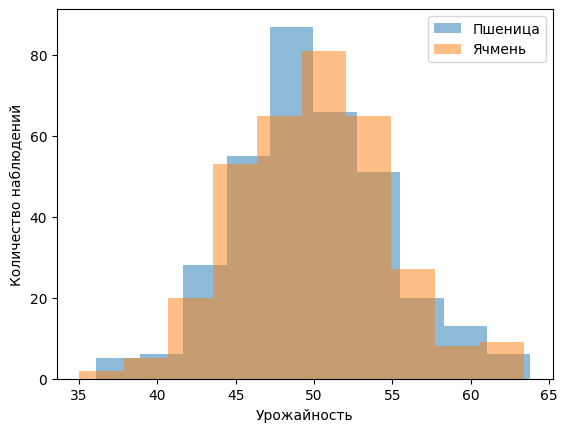

In [ ]:
wheat_yield = data[data['group'] == 'wheat']['crop_yield']
barley_yield = data[data['group'] == 'barley']['crop_yield']

plt.hist(wheat_yield, alpha=0.5, label='Пшеница')
plt.hist(barley_yield, alpha=0.5, label='Ячмень')
plt.legend()
plt.xlabel('Урожайность')
plt.ylabel('Количество наблюдений')
plt.show()

In [ ]:
print(stats.shapiro(wheat_yield))
print(stats.shapiro(barley_yield))

ShapiroResult(statistic=0.993455708026886, pvalue=0.15188860893249512)
ShapiroResult(statistic=0.9955407977104187, pvalue=0.4560832977294922)


**Вывод:** Распределение данных незначитительно отклоняется от нормального. Более того, согласно критерию Шапиро-Уилка данные статистически незначимо отличается от нормального распределения. Таким образом, можно использовать критерий Стьюдента на этих данных.

In [ ]:
stats.fligner(wheat_yield, barley_yield)

FlignerResult(statistic=0.0056512461653668074, pvalue=0.9400756575239071)

**Вывод:** p-value > 0.05, не отвергаем нулевую гипотезу: дисперсии равны.

In [ ]:
stats.ttest_ind(wheat_yield, barley_yield, equal_var=False)

TtestResult(statistic=-0.2880934317433946, pvalue=0.7733643654493622, df=669.6286207502645)

**Вывод:** p-value > 0.05, не отвергаем нулевую гипотезу: средние урожайности равны.

### 37-40 Критерий Стьюдента для парных выборок

Подходящих данных в моих датасетах нет, поэтому я их создам.

Данные будут содержать информацию об урожайности одинаковых культур на одних и тех же фермах, собранных весной ('SpringHarvest') и осенью ('FallHarvest').

In [ ]:
np.random.seed(0)
data = pd.DataFrame({
    'SpringHarvest': np.random.normal(400, 50, 1000),
    'FallHarvest': np.random.normal(450, 50, 1000)
})
data.head(3)

,SpringHarvest,FallHarvest
0,488.202617,477.798134
1,420.007860,494.623694
2,448.936899,428.884259


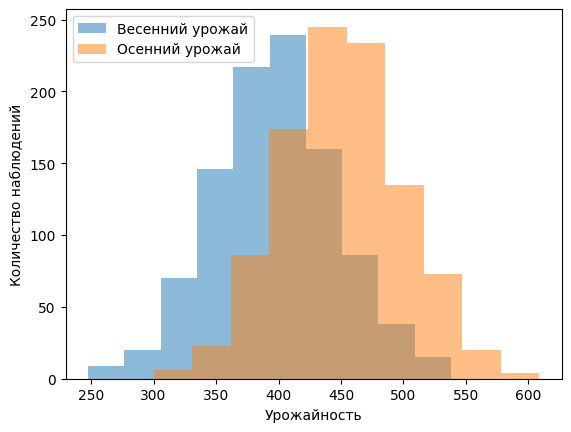

In [ ]:
plt.hist(data['SpringHarvest'], alpha=0.5, label='Весенний урожай')
plt.hist(data['FallHarvest'], alpha=0.5, label='Осенний урожай')
plt.legend()
plt.xlabel('Урожайность')
plt.ylabel('Количество наблюдений')
plt.show()

**Вывод**: распределение данных статистически незначимо отличается от нормального, поэтому можно применять критерий Стьюдента.

In [ ]:
stats.ttest_rel(data['SpringHarvest'], data['FallHarvest'])

TtestResult(statistic=-23.8339960086846, pvalue=9.107815321481857e-100, df=999)

**Вывод:** pvalue < 0.05, отвергаем нулевую гипотезу: средние урожайности различны для весеннего и осеннего урожая.

### 41-45 Критерий Манна-Уитни

Подходящих данных в моих датасетах нет, поэтому я их создам.

Условия для создания данных для критерия Манна-Уитни:
1. Номинальная шкала должна иметь ровно два уровня.
2. Данные внутри сравниваемых групп могут быть распределены ненормально.

Задание: Сравнение урожайности фермеров двух регионов.
Тогда
1. "Регион" - номинальная шкала, которая может принимать значения: "North" или "South".
2. "Урожайность" — случайная величина, имеющая экспоненциальное распределение.

In [ ]:
np.random.seed(0)
data = pd.DataFrame({
    'Region': np.random.choice(['North', 'South'], size=1000),
    #'CropYield': np.random.poisson(999, 121)
    'CropYield': np.random.exponential(500, size=1000)  # Используем экспоненциальное распределение
})
data.head()

,Region,CropYield
0,North,185.807878
1,South,233.432172
2,South,372.189125
3,North,694.338645
4,South,202.863170


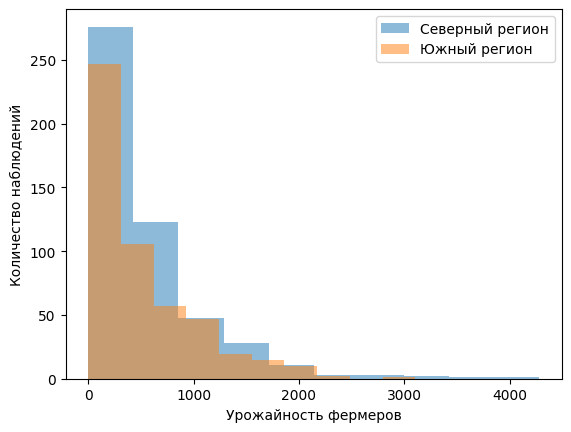

In [ ]:
north_region = data[data['Region'] == 'North']['CropYield']
south_region = data[data['Region'] == 'South']['CropYield']
plt.hist(north_region, alpha=0.5, label='Северный регион') # , bins=15
plt.hist(south_region, alpha=0.5, label='Южный регион')
plt.legend()
plt.xlabel('Урожайность фермеров')
plt.ylabel('Количество наблюдений')
plt.show()

**Вывод:** Распределение данных в северном и южном регионах сильно отличаются от нормального распределения.

In [ ]:
stats.mannwhitneyu(north_region, south_region)

MannwhitneyuResult(statistic=129656.0, pvalue=0.3071389165468459)

In [ ]:
print(np.median(north_region), np.median(south_region))

362.0124347670224 328.2380298090591


**Вывод:** p-value > 0.05, не отвергаем нулевую гипотезу: нет статистически значимых различий в урожайности между регионами фермеров. Различия медиан находятся в пределах статистической погрешности.

### 46-49 Критерий T-Вилкоксона (критерий знаков)

Подходящих данных в моих датасетах нет, поэтому я их создам.

Задача: Сравнить уровень урожайности фермеров до и после внедрения новой технологии. Мы знаем, что распределения уровней урожайности отличаются от нормального. Поэтому требуется сравнить медианы уровней урожайности в двух связанных выборках.

In [ ]:
np.random.seed(1)

# медиана 500,
# количество случайных чисел (100) из равномерного распределения в интервале от 0 до 1,
# умножаем на 10 (интервал от 0 до 10)
data1 = 500 + np.random.rand(100) * 10
data2 = 510 + np.random.rand(100) * 10 # медиана 510
data1[:5]

array([504.17022005, 507.20324493, 500.00114375, 503.02332573,
       501.46755891])

In [ ]:
stats.wilcoxon(data1, data2)

WilcoxonResult(statistic=0.0, pvalue=3.896559845095909e-18)

**Вывод:** p-value < 0.05, отвергаем нулевую гипотезу: уровень урожайности различается до и после внедрения новой технологии, так как медианы не равны.

### 50-53 Дисперсионный анализ (ANOVA)

Подходящих данных в моих датасетах нет, поэтому я их создам.

Требования к данным:
1. Номинальная шкала: 3 и более уровней
2. Данные внутри сравниваемых подгрупп нормально распределены.
3. Каждый уровень номанальной шкалы должен иметь хотя бы 30 значений.

Проверка равенства средних значений.

Задача: Сравнить уровень урожайности фермеров в трех регионах. Мы знаем, что распределения урожайности не существенно отличаются от нормального, и дисперсии примерно одинаковы

In [ ]:
np.random.seed(1)
data1 = 50 + np.random.randn(100) * 5
data2 = 50 + np.random.randn(100) * 5
data3 = 52 + np.random.randn(100) * 5

print(data1[:5], stats.shapiro(data1), sep='\n', end='\n')
print(stats.shapiro(data2))
print(stats.shapiro(data3))

[58.12172682 46.94121793 47.35914124 44.63515689 54.32703815]
ShapiroResult(statistic=0.9920047521591187, pvalue=0.8215700387954712)
ShapiroResult(statistic=0.9888345003128052, pvalue=0.5716096758842468)
ShapiroResult(statistic=0.9902603030204773, pvalue=0.6856458783149719)


**Вывод:** p-value > 0.05, нулевая гипотеза о нормальном распределении данных не отвергается. Данные статистически значимо не отличаются от нормального распределения.

In [ ]:
stats.f_oneway(data1, data2, data3)

F_onewayResult(statistic=3.6545375499692327, pvalue=0.027043909170728936)

**Вывод:** pvalue < 0.05, отвергаем нулевую гипотезу: средний уровень урожайности различается между регионами.

### 54-57 H-Краскала-Уолеса (Раздел 10)

Подходящих данных в моих датасетах нет, поэтому я их создам.

Требования к данным:
1. Номинальная шкала: 3 и более уровней
2. Данные внутри сравниваемых подгрупп ненормально распределены.


Проверка равенства медианных значений.

Задача:


In [ ]:
np.random.seed(1)
data1 = 50 + np.random.rand(100) * 10
data2 = 51 + np.random.rand(100) * 10
data3 = 52 + np.random.rand(100) * 10

In [ ]:
stats.kruskal(data1, data2, data3)

KruskalResult(statistic=34.74654883720939, pvalue=2.8502489044096515e-08)

**Вывод:** pvalue < 0.05, отвергаем нулевую гипотезу: медианы уровня урожайности различаются между регионами.

### 58-60 Хи-квадрат Фридмана (Раздел 11)

Подходящих данных в моих датасетах нет, поэтому я их создам.

Задача: Cравнить урожайность фермеров в регионе в разные периоды времени, пусть 3 месяца. Известно, что распределения урожайности отличаются от нормального и дисперсии разные.

Предположим, что созданные нами в прошлом пункте data1, data2, data3 содержат урожайность фермеров в регионе в разные периоды времени, пусть за весну, лето и осень.


In [ ]:
stats.friedmanchisquare(data1, data2, data3)

FriedmanchisquareResult(statistic=36.24000000000001, pvalue=1.3507780286373922e-08)

**Вывод:** pvalue < 0.05, отвергаем нулевую гипотезу: медианы урожайности различаются в разные временные периоды.

### 61-69 Анализ мощности для критерия Стьюдента для независимых выборок (Раздел 12)

**Задание:** изучить влияние уровня образования фермеров на их средний урожай.

Данные о двух группах фермеров:
- одни с высшим образованием,
- другие без него.

Необходимо сравнить средний урожай между этими двумя группами.

Известно, что стандартное отклонение урожая (σ) составляет 20 кг, а различие в среднем урожае на 10 кг считается существенным.

Необходимо обнаружить эффект величиной d = ((μ1 - μ2)) / σ = 10 / 20 = 0.5 или больше, где
- μ1 – среднее значение урожая для фермеров с высшим образованием,
- μ2 – среднее значение урожая для фермеров без высшего образования,
- σ – стандартное отклонение общей ошибки.

α = 0.05 (для 95% доверительного интервала) и β = 0.10 (для 90% мощности).

In [ ]:
# Задаем параметры
effect_size = 0.5
alpha = 0.05
power = 0.90
ratio = 1.0

# Создаем анализ мощности
analysis = TTestIndPower()

# Рассчитываем объем выборки
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=ratio, alternative='two-sided')
sample_size

85.03128688801092

**Вывод:** Для обнаружения различия в средних между двумя группами фермеров с эффектом размера (effect size) 0.5, уровнем значимости (alpha) 0.05 и мощностью (power) 0.90, необходимо иметь выборку из примерно 86 фермеров в каждой из двух групп.

Предположим, что мы хотим обнаружить различие в среднем урожае 5 кг. Нам нужно уменьшить вероятность ошибки до 1 из 100 и исследовать по 30 фермеров в каждой группе.

In [ ]:
# Задаем новые параметры
effect_size = 5 / 20  # Эффект 5 кг относительно стандартного отклонения
alpha = 0.01  # Вероятность ошибки 1%
sample_size = 30

# Рассчитываем мощность
power = analysis.solve_power(effect_size=effect_size,
                             power=None,
                             nobs1=sample_size,
                             ratio=ratio,
                             alpha=alpha)
power

0.05125059401639203

**Вывод:** Существует всего 5.13% вероятность обнаружить статистически значимое различие между группами при условии, что истинный эффект составляет 5/20 (0.25) стандартных отклонений, вероятность ошибки 1%, и размер выборки составляет 30 человек в каждой группе. Таким образом, при выбранных параметрах и размере выборки шансы обнаружить статистически значимый эффект довольно низкие.

#### два графика

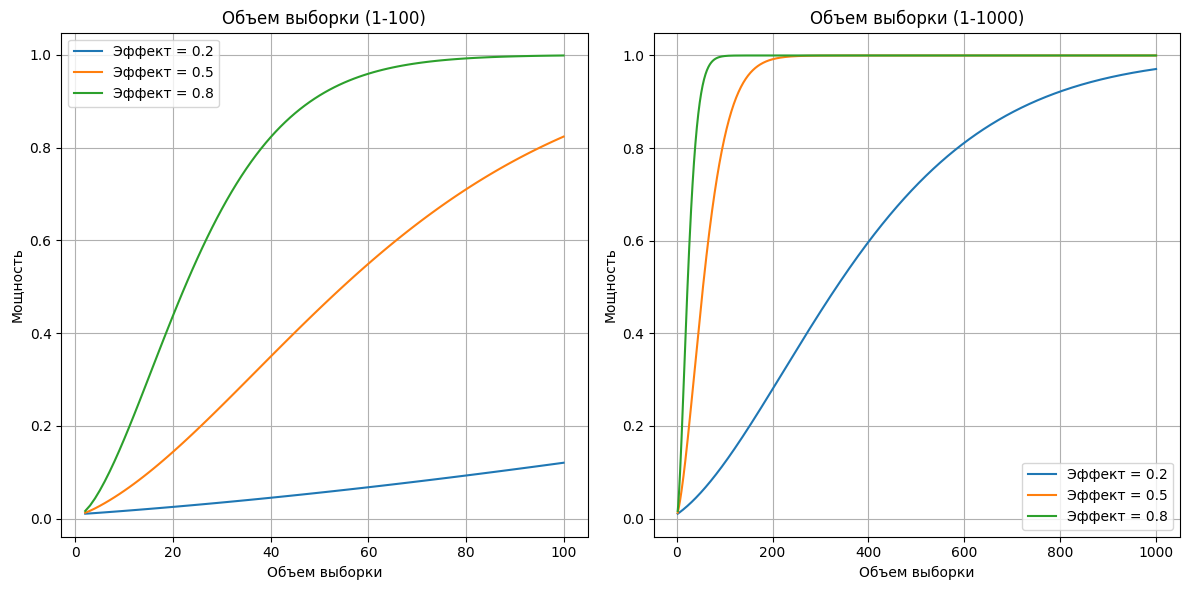

In [ ]:
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes_1 = np.array(range(1, 101))
sample_sizes_2 = np.array(range(1, 1001))

power_matrix_1 = np.zeros((len(effect_sizes), len(sample_sizes_1)))
power_matrix_2 = np.zeros((len(effect_sizes), len(sample_sizes_2)))

for i, effect in enumerate(effect_sizes):
    for j, n in enumerate(sample_sizes_1):
        power = analysis.solve_power(effect_size=effect,
                                     power=None,
                                     nobs1=n,
                                     ratio=ratio,
                                     alpha=alpha)
        power_matrix_1[i, j] = power

for i, effect in enumerate(effect_sizes):
    for j, n in enumerate(sample_sizes_2):
        power = analysis.solve_power(effect_size=effect,
                                     power=None,
                                     nobs1=n,
                                     ratio=ratio,
                                     alpha=alpha)
        power_matrix_2[i, j] = power

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Создаем первый график
for i, effect in enumerate(effect_sizes):
    plt.plot(sample_sizes_1, power_matrix_1[i, :], label=f'Эффект = {effect}')

plt.title("Объем выборки (1-100)")
plt.xlabel("Объем выборки")
plt.ylabel("Мощность")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)  # Создаем второй график
for i, effect in enumerate(effect_sizes):
    plt.plot(sample_sizes_2, power_matrix_2[i, :], label=f'Эффект = {effect}')

plt.title("Объем выборки (1-1000)")
plt.xlabel("Объем выборки")
plt.ylabel("Мощность")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


#### **Вывод:**
Для эффекта 0.2 необходим объем выборки минимум 590 для достижения 80% мощности. Для эффекта 0.5 - 90, для эффекта 0.8 - достаточно 38. Таким образом, мощность исследования зависит от силы эффекта, а сила эффекта зависит от объема выборки.

### 70-72.Анализ мощности для сбалансированного однофакторного дисперсионного анализа (Раздел 13)

**Задание:**  есть 5 разных видов удобрений и необходимо добиться мощности анализа не менее 0.8 с уровнем значимости 0.05 и размером эффекта не менее 0.25


In [ ]:
# Задаем параметры
alpha = 0.05
power = 0.8
effect_size = 0.25
k_groups = 5  # Количество групп

# Создаем класс анализа мощности
analysis = FTestAnovaPower()

# Рассчитываем объем выборки для каждой группы
sample_size = analysis.solve_power(effect_size=effect_size,
                                   nobs=None,
                                   alpha=alpha,
                                   k_groups=k_groups,
                                   power=power)
sample_size

195.76624465698336

**Вывод**: Для проведения сбалансированного однофакторного дисперсионного анализа с заданными параметрами (мощность 0.8, уровень значимости 0.05 и размер эффекта 0.25), потребуется собрать 196 наблюдений в каждой из 5 групп фермеров.

---

## additionally


Предположим, что итоговые результаты по сравнению с пробным изменились в диапазоне от 0 до 20% (но от 0 до 100 включительно). Создадим новые колонки "math score 2", "reading score 2" и "writing score 2".  

In [ ]:
# Функция для изменения значений с ограничением
def modify_scores(df, new_cols ,columns, percentage=0.2):
    for i in range(len(columns)):
        # Генерируем случайные приращения в пределах [-percentage, percentage]
        increments = np.random.uniform(-percentage, percentage, len(df))

        # Применяем приращения к столбцу
        df[columns[i]] += increments

        # Ограничиваем значения в интервале [0, 100]
        df[new_cols[i]] =  np.clip(df[columns[i]] * (1 + increments), 0, 100) #np.clip(df[columns[i]], 0, 100)
    return df
# Вызываем функцию для изменения значений в указанных столбцах
modified_df = modify_scores(df_4, ['math score 2', 'reading score 2', 'writing score 2'] ,['math score', 'reading score', 'writing score'])

# Выводим результат
modified_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math results,TPC after,math score 2,reading score 2,writing score 2
0,female,group B,bachelor's degree,standard,False,72.135923,71.997452,74.069771,True,False,81.940831,71.814017,79.237707
1,female,group C,some college,standard,True,69.043568,89.924083,88.011331,True,False,72.051654,83.097302,89.008573
2,female,group B,master's degree,standard,False,90.021475,95.121169,92.953799,True,False,91.954643,100.000000,88.659234
3,male,group A,associate's degree,free/reduced,False,47.035912,57.148503,44.002576,False,False,48.725077,65.635205,44.115934
4,male,group C,some college,standard,False,75.926929,78.124114,75.020411,True,True,70.378872,87.820385,76.551622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,True,88.108858,99.076166,95.137667,True,True,97.700176,100.000000,100.000000
996,male,group C,high school,free/reduced,False,62.085516,55.138549,54.879763,True,True,67.394804,62.777962,48.281161
997,female,group C,high school,free/reduced,True,59.076667,70.865836,65.108287,True,False,63.605890,61.358209,72.158667
998,female,group D,some college,standard,True,68.092199,78.112316,76.858271,True,True,74.370214,86.885572,65.965223
